## **Name: Anjani Nandan**
## **Enrollment: 23112017**
## **Branch: ChE**

# **Exploratory Data Analysis (EDA) on Churn Dataset**
This notebook performs a comprehensive EDA, including univariate, bivariate analysis, outlier detection, and correlation analysis.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

file_path = "Churn_Modelling.csv"
df = pd.read_csv(file_path)
print("## Dataset Overview")
df.info()
df.head()

## Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Some mathematical analysis


In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Univariate Analysis**

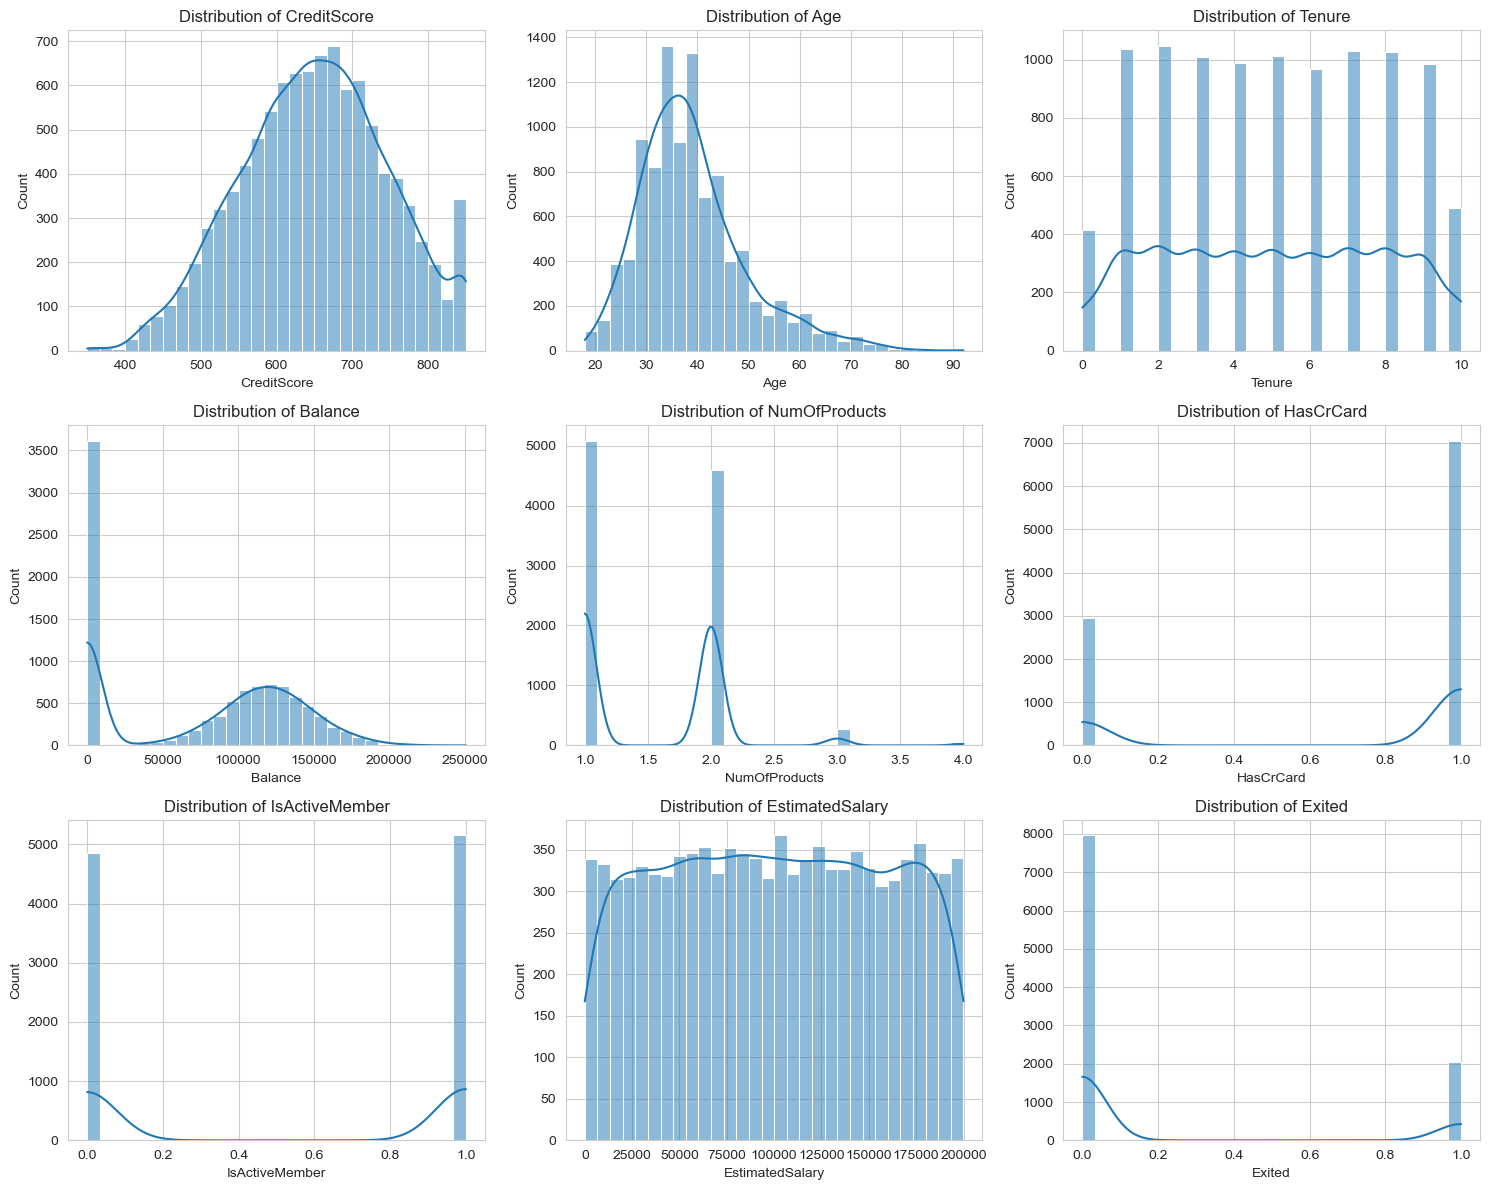

In [22]:

sns.set_style("whitegrid")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols[2:]):  
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## **Categorical Variables Analysis**

C:\Users\anjan\AppData\Local\Temp\ipykernel_7872\3595008589.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm", ax=axes[i])  # Fix applied
C:\Users\anjan\AppData\Local\Temp\ipykernel_7872\3595008589.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm", ax=axes[i])  # Fix applied
C:\Users\anjan\AppData\Local\Temp\ipykernel_7872\3595008589.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm", ax=axes[i])  # Fix applied
C:\Users\anjan\A

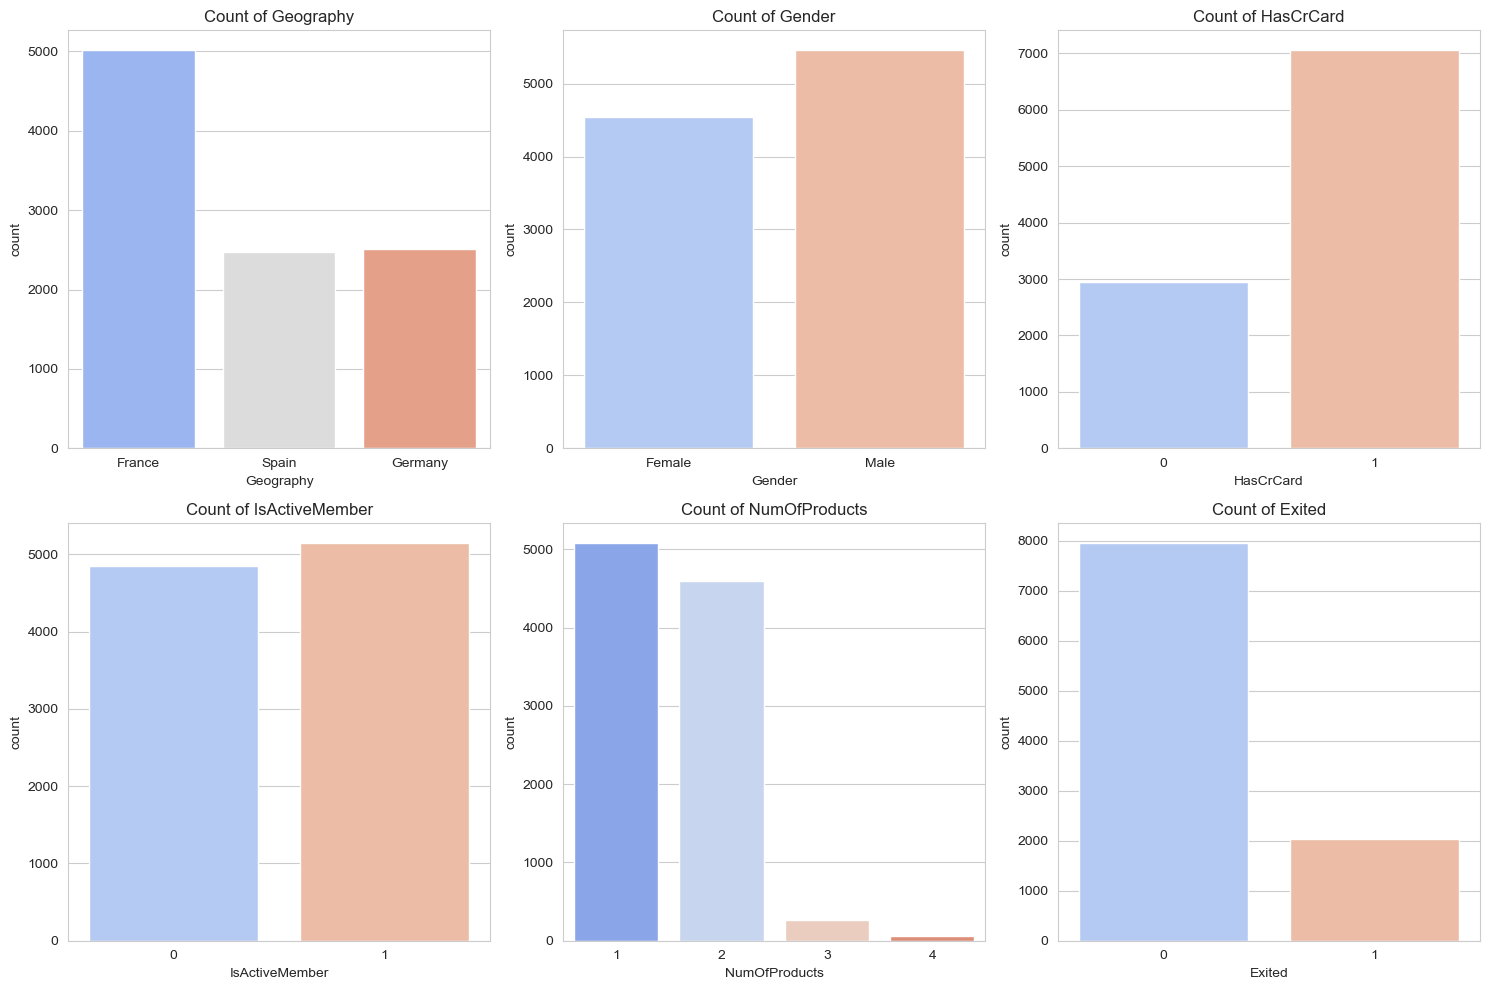

In [23]:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, palette="coolwarm", ax=axes[i])  # Fix applied
    axes[i].set_title(f"Count of {col}")

plt.tight_layout()
plt.show()


# **Bivariate Analysis (Churn vs. Categorical Variables)**

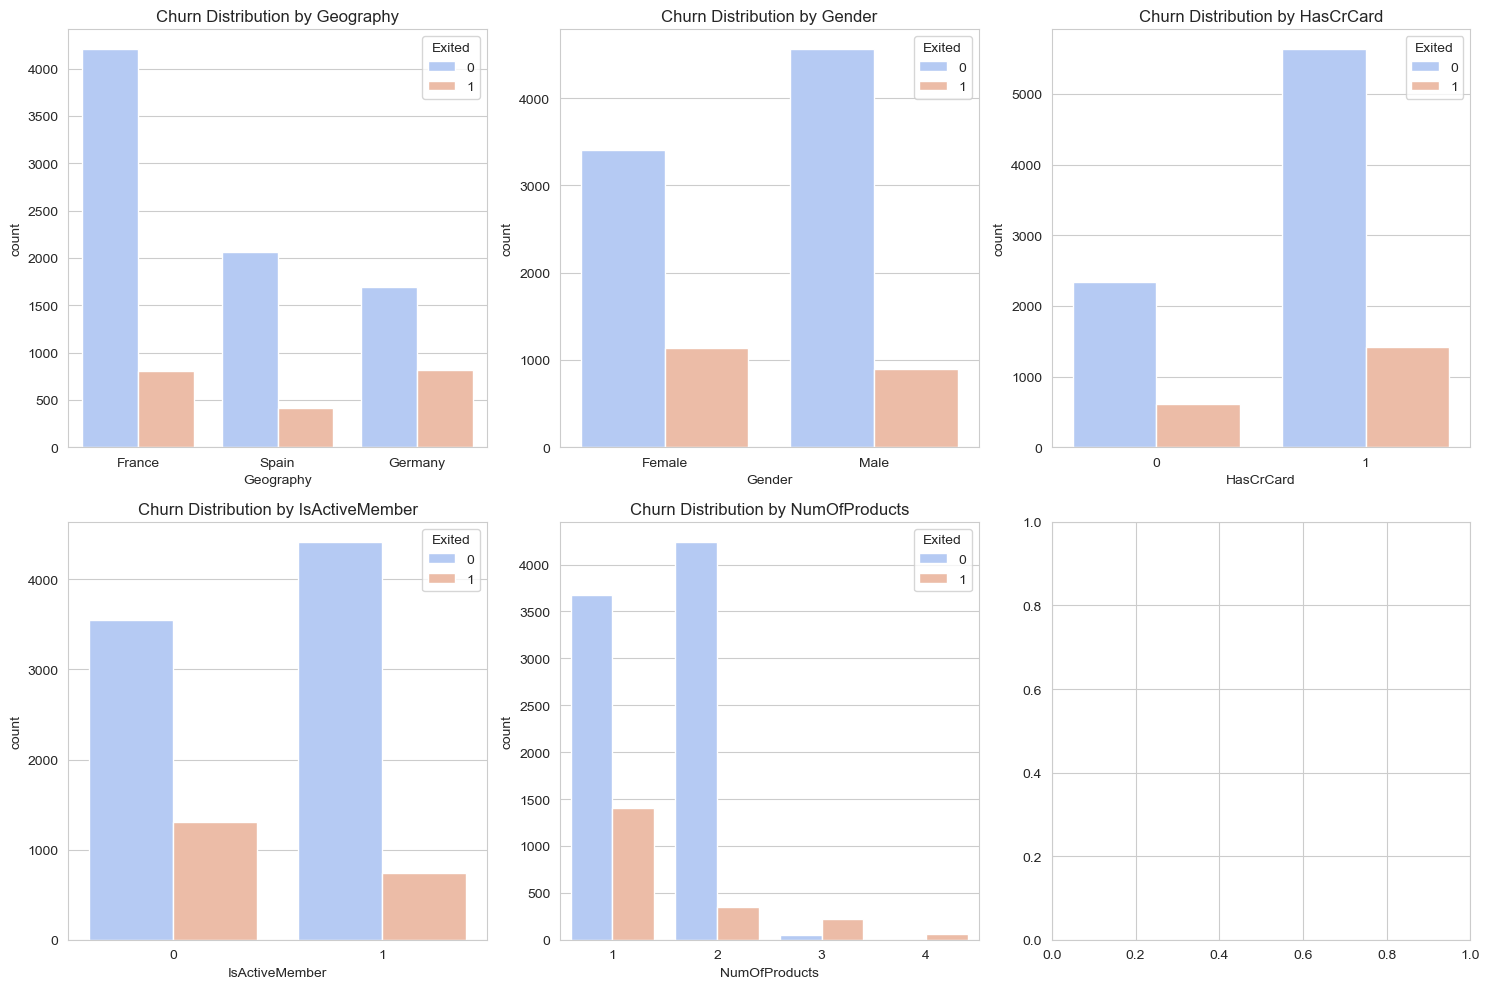

In [24]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:-1]):  # Exclude 'Exited' itself
    sns.countplot(x=df[col], hue=df['Exited'], palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Churn Distribution by {col}")

plt.tight_layout()
plt.show()

# Multivariate Analysis

## Pairplot for numerical features

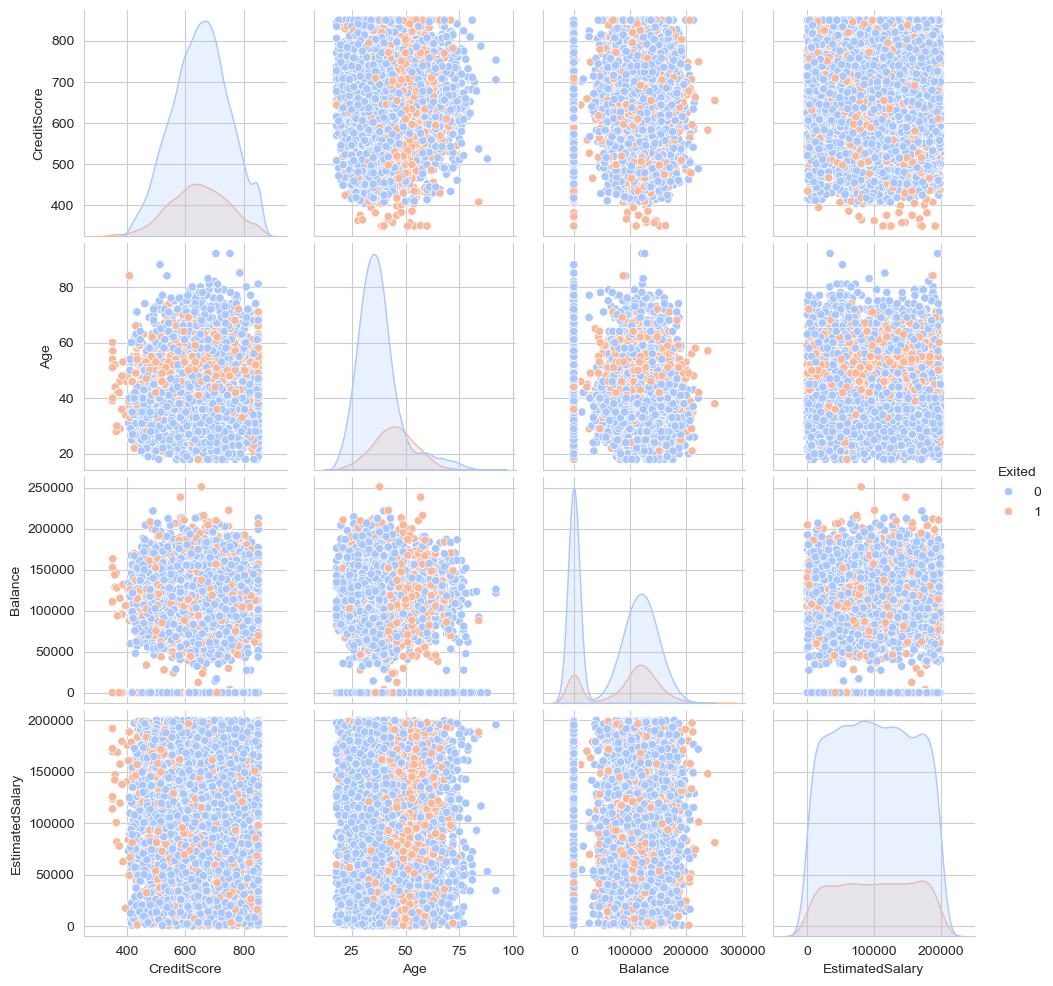

In [25]:

sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette="coolwarm")
plt.show()


## Boxplot for Age distribution across different Geographies

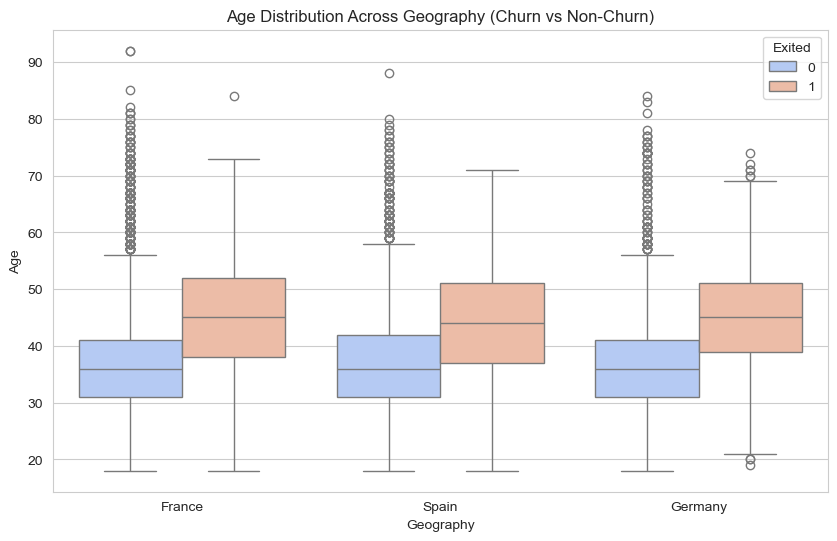

In [26]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Geography', y='Age', hue='Exited', palette="coolwarm")
plt.title("Age Distribution Across Geography (Churn vs Non-Churn)")
plt.show()


## Stacked bar plot for Gender & Churn

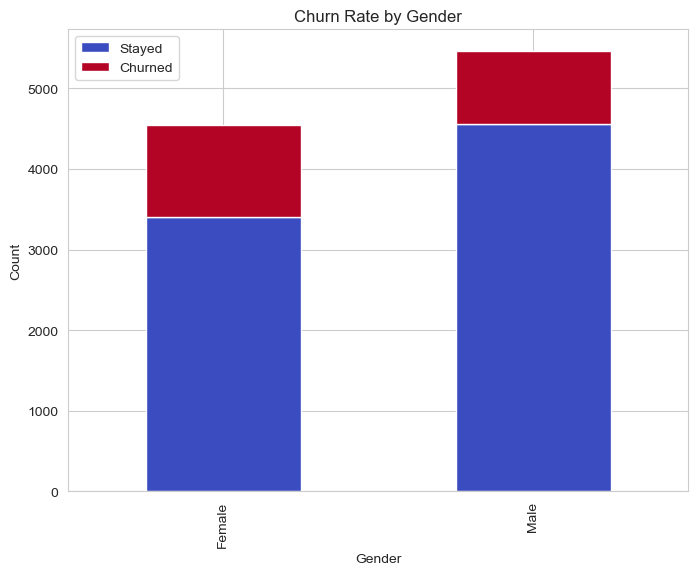

In [27]:

pd.crosstab(df['Gender'], df['Exited']).plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()



## Percentage of churn per country

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


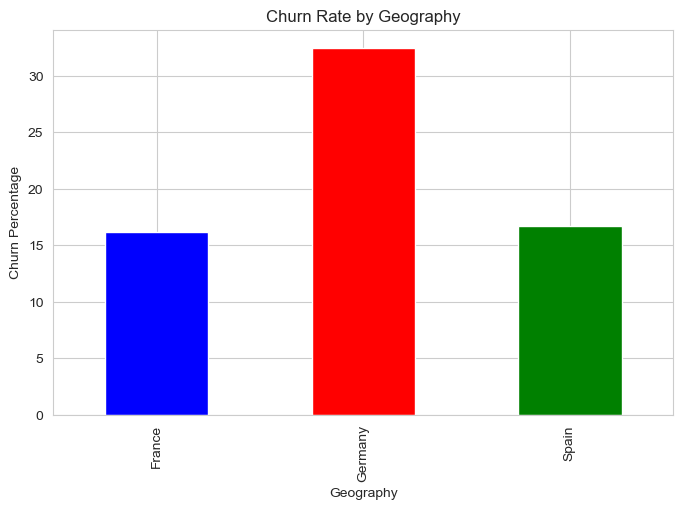

In [28]:

churn_by_geo = df.groupby("Geography")["Exited"].mean() * 100
print(churn_by_geo)

# Plot
churn_by_geo.plot(kind="bar", color=["blue", "red", "green"], figsize=(8, 5))
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Percentage")
plt.show()


## Percentage of churn per number of products

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64


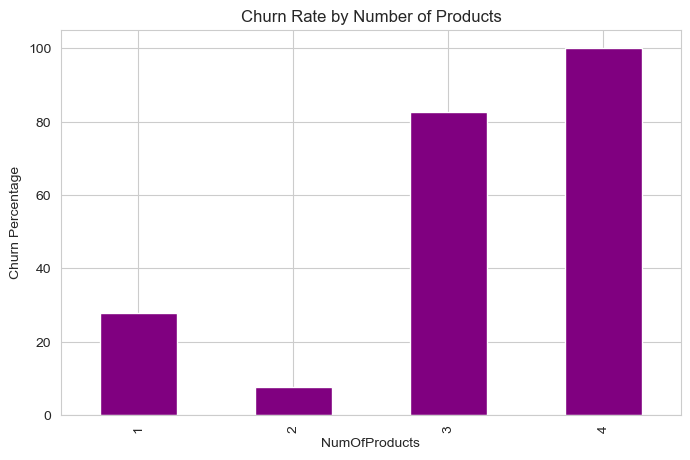

In [29]:

churn_by_products = df.groupby("NumOfProducts")["Exited"].mean() * 100
print(churn_by_products)

# Plot
churn_by_products.plot(kind="bar", color="purple", figsize=(8, 5))
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Percentage")
plt.show()


## Grouping by active status

IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


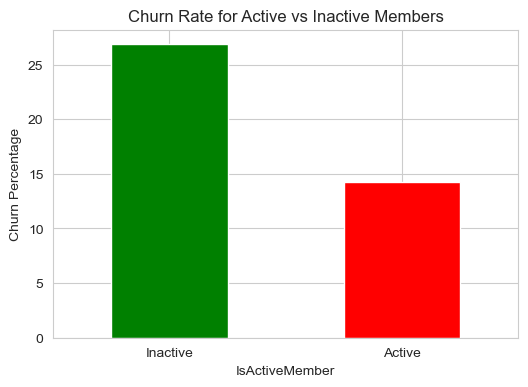

In [30]:

churn_by_active = df.groupby("IsActiveMember")["Exited"].mean() * 100
print(churn_by_active)


churn_by_active.plot(kind="bar", color=["green", "red"], figsize=(6, 4))
plt.title("Churn Rate for Active vs Inactive Members")
plt.xticks(ticks=[0, 1], labels=["Inactive", "Active"], rotation=0)
plt.ylabel("Churn Percentage")
plt.show()


# **Outlier Detection using IQR**

In [31]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

outlier_counts = {col: detect_outliers_iqr(df, col) for col in num_cols[2:]}
print("## Outlier Detection using IQR")
print(outlier_counts)

## Outlier Detection using IQR
{'CreditScore': 15, 'Age': 359, 'Tenure': 0, 'Balance': 0, 'NumOfProducts': 60, 'HasCrCard': 0, 'IsActiveMember': 0, 'EstimatedSalary': 0, 'Exited': 2037}


# **Correlation Analysis**

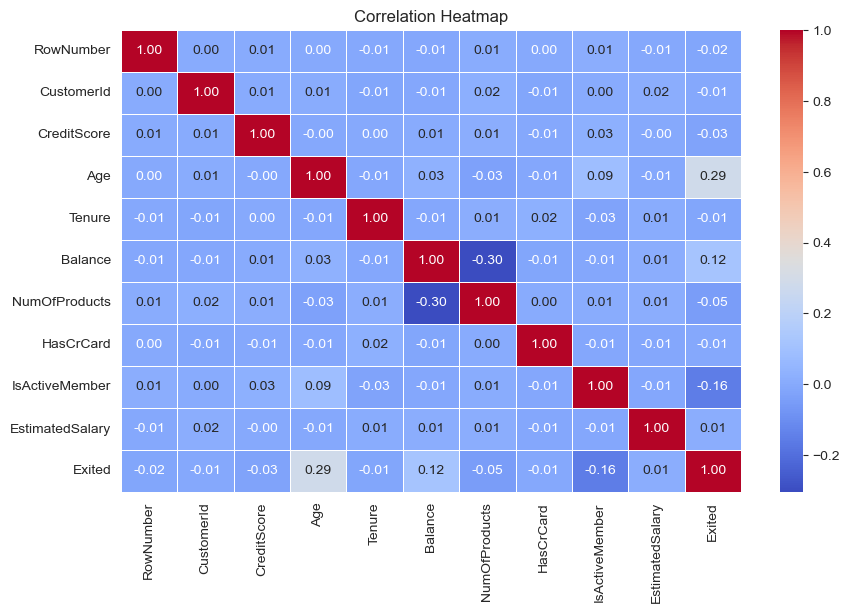

In [32]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Exploratory Data Analysis (EDA) on Churn Dataset**

## **1. Dataset Overview**
- The dataset contains customer details such as geography, age, balance, number of products, and whether they churned.
- It has numerical and categorical features.

## **2. Univariate Analysis**
- **Age Distribution**: Most customers are between 30-40 years old.
- **Balance Distribution**: Some customers have zero balance, indicating possible specific banking conditions.
- **NumOfProducts**: Most customers have 1-2 products, with fewer having 3 or more.
- **Exited**: The dataset has a class imbalance—more customers stayed than churned.

## **3. Categorical Variables Analysis**
- **Geography**: More customers are from France, followed by Germany and Spain.
- **Gender**: Slightly more male customers than female.
- **IsActiveMember**: A significant portion of customers are inactive.
- **HasCrCard**: The majority of customers have a credit card.

## **4. Bivariate Analysis (Churn vs. Other Features)**
- **Geography & Churn**: German customers have a higher churn rate.
- **Gender & Churn**: Female customers churn more than males.
- **IsActiveMember & Churn**: Active members have a lower churn rate.
- **NumOfProducts & Churn**: Customers with 3 or more products churn significantly more.

## **5. Multiivariate Analysis (Churn vs. Other Features)**

- **Germany has the highest churn rate**, requiring regional strategies.  
- **Customers with more products churn more**, signaling potential dissatisfaction.  
- **Inactive members have a higher churn rate**, highlighting the importance of engagement.  
- **Gender impacts churn**, suggesting the need for tailored retention efforts.  

## **6. Outlier Detection using IQR**
- **Age**: Many older customers are outliers.
- **CreditScore**: A few extremely high/low scores exist.
- **NumOfProducts**: Outliers in customers with 3+ products.

## **7. Correlation Analysis**
- **Age & Churn**: Older customers are more likely to churn.
- **IsActiveMember & Churn**: Negative correlation, indicating active members are more loyal.
- **NumOfProducts & Churn**: Customers with multiple products are at higher risk of churn.
- **Balance, CreditScore, EstimatedSalary**: Weak correlation with churn, meaning they have minimal impact.

## **Conclusion**
- Retaining older customers and those with multiple products should be a focus.
- Engaging inactive members could help reduce churn.
- Country-specific retention strategies, especially in Germany, might be necessary.
